In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mp
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib.pyplot import MultipleLocator
from scipy.interpolate import make_interp_spline

In [2]:
df = pd.read_excel("D:/博士/冬小麦-2/群体发育.xlsx",sheet_name="氮肥")
da = pd.read_excel("D:/博士/冬小麦-2/群体发育.xlsx",sheet_name="共同体")
df.head()

,Period,Year,Variety,Nitrogen,population dynamics,dd
0,10,2020-2021,J22,N0,205.833333,1
1,10,2021-2022,J22,N0,206.666667,1
2,10,2020-2021,J22,N0,211.666667,2
3,10,2021-2022,J22,N0,228.333333,2
4,10,2020-2021,J22,N0,215.833333,3


In [3]:
df1 = df[df["Year"]=="2020-2021"]
df2 = df[df["Year"]=="2021-2022"]

da1 = da[da["Year"]=="2020-2021"]
da2 = da[da["Year"]=="2021-2022"]

In [4]:
da1.head()

,Year,period,Treatment,population dynamics,dd
0,2020-2021,10,T1,301.666667,1
1,2020-2021,10,T1,305.000000,2
2,2020-2021,10,T1,298.333333,3
3,2020-2021,10,T1,303.333333,4
8,2020-2021,145,T1,1346.666667,1


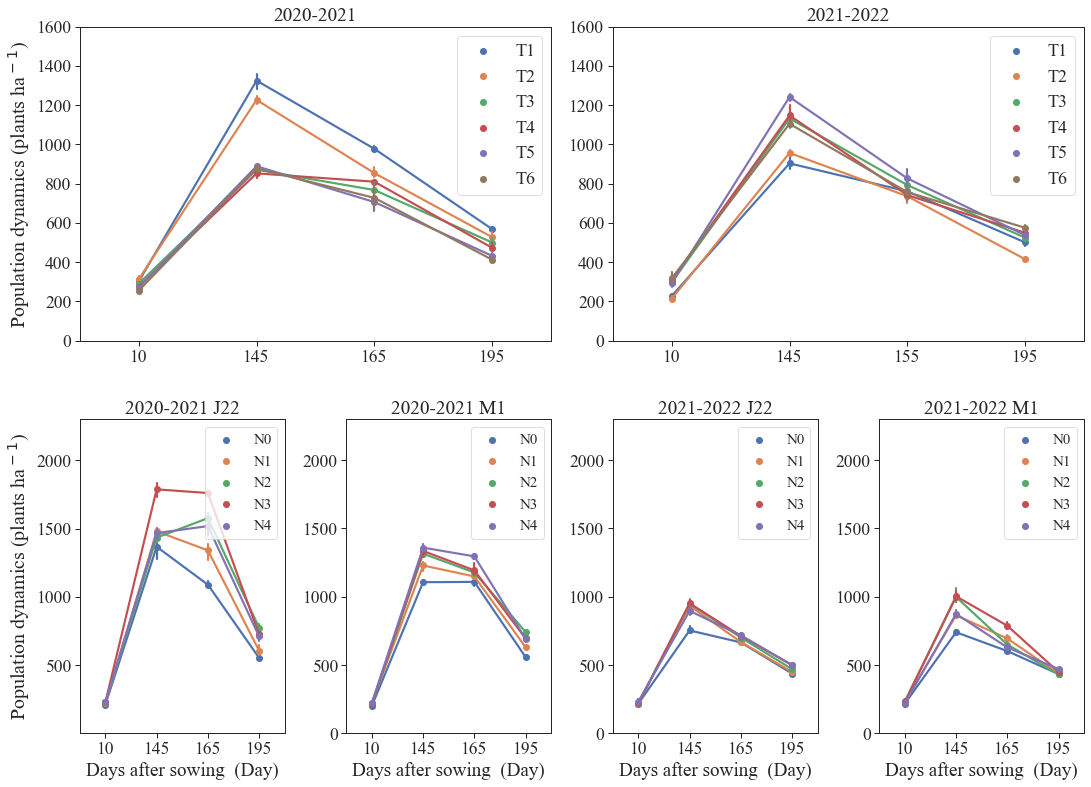

In [5]:
fig=plt.figure(figsize=(18,13))
rc = {'font.sans-serif': 'Times New Roman'}
sns.set_style("ticks",{'font.sans-serif':'Times New Roman'})
sns.set(context='paper', style='ticks', font_scale=2, rc=rc)

#画第1个图
ax1=plt.subplot2grid((2,4),(1,0),colspan=1,rowspan=1)
sns.pointplot(x= df1[df1["Variety"]=="J22"]["Period"],y = df1[df1["Variety"]=="J22"]["population dynamics"],
              hue = df1['Nitrogen'],ax=ax1)
ax1.legend(loc=1, fontsize=15)
#ax1.set(ylabel='population dynamics(plants ha${^-}$${^1}$)')
ax1.set_ylabel(ylabel='Population dynamics (plants ha${^-}$${^1}$)',fontsize=20)
ax1.set_ylim(1, 2300)
ax1.set(xlabel="Days after sowing  (Day)")
ax1.set(title='2020-2021 J22')

ax2=plt.subplot2grid((2,4),(1,1),colspan=1,rowspan=1)
sns.pointplot(x= df1[df1["Variety"]=="M1"]["Period"],y = df1[df1["Variety"]=="M1"]["population dynamics"],
              hue = df1['Nitrogen'],ax=ax2)
ax2.legend(loc=0, fontsize=15)
ax2.set(ylabel=None)
ax2.set_ylim(0, 2300)
ax2.set(xlabel="Days after sowing  (Day)")
ax2.set(title='2020-2021 M1')

ax3=plt.subplot2grid((2,4),(1,2),colspan=1,rowspan=1)
sns.pointplot(x= df2[df2["Variety"]=="J22"]["Period"],y = df2[df2["Variety"]=="J22"]["population dynamics"],
              hue = df2['Nitrogen'],ax=ax3)
ax3.legend(loc=1, fontsize=15)
ax3.set(ylabel=None)
ax3.set_ylim(0, 2300)
ax3.set(xlabel="Days after sowing  (Day)")
ax3.set(title='2021-2022 J22')

ax4=plt.subplot2grid((2,4),(1,3),colspan=1,rowspan=1)
sns.pointplot(x= df2[df2["Variety"]=="M1"]["Period"],y = df2[df2["Variety"]=="M1"]["population dynamics"],
              hue = df2['Nitrogen'],ax=ax4)
ax4.legend(loc=0, fontsize=15)
ax4.set(ylabel=None)
ax4.set_ylim(0, 2300)
ax4.set(xlabel="Days after sowing  (Day)")
ax4.set(title='2021-2022 M1')

ax5=plt.subplot2grid((2,4),(0,0),colspan=2,rowspan=1)
sns.pointplot(x= da1["period"],y = da1["population dynamics"],
              hue = da1['Treatment'],ax=ax5)
ax5.legend(loc=1, fontsize=18)
ax5.set_ylabel(ylabel='Population dynamics (plants ha${^-}$${^1}$)',fontsize=20)
ax5.set_ylim(0, 1600)
ax5.set(xlabel="Days after sowing  (Day)")
ax5.set(xlabel=None)
ax5.set(title='2020-2021')

ax6=plt.subplot2grid((2,4),(0,2),colspan=2,rowspan=1)
sns.pointplot(x= da2["period"],y = da2["population dynamics"],
              hue = da2['Treatment'],ax=ax6)
ax6.legend(loc=1, fontsize=18)
ax6.set(ylabel=None)
ax6.set_ylim(0, 1600)
ax6.set(xlabel="Days after sowing  (Day)")
ax6.set(xlabel=None)
ax6.set(title='2021-2022')

plt.subplots_adjust(wspace = 0.3, hspace = 0.25)

#plt.savefig(r'D:/博士/冬小麦-2/图/群体.jpg',dpi=600)

In [6]:
df = pd.read_excel("D:/博士/冬小麦-2/群体发育.xlsx",sheet_name="氮肥")
da = pd.read_excel("D:/博士/冬小麦-2/群体发育.xlsx",sheet_name="共同体")
df.head()

,Period,Year,Variety,Nitrogen,population dynamics,dd
0,10,2020-2021,J22,N0,205.833333,1
1,10,2021-2022,J22,N0,206.666667,1
2,10,2020-2021,J22,N0,211.666667,2
3,10,2021-2022,J22,N0,228.333333,2
4,10,2020-2021,J22,N0,215.833333,3


In [5]:
df.pivot_table(index='Period',columns=['Year', 'Variety', 'Nitrogen']).to_excel('D:/博士/冬小麦-2/qq.xlsx')

In [12]:
df1 = df.pivot_table(index='Period',columns=['Year', 'Variety', 'Nitrogen'])

In [13]:
df1

dd                             ... population dynamics  \
Year     2020-2021                             ...           2021-2022   
Variety        J22             M1              ...                 J22   
Nitrogen        N0 N1 N2 N3 N4 N0 N1 N2 N3 N4  ...                  N0   
Period                                         ...                       
10               2  2  2  2  2  2  2  2  2  2  ...          217.222222   
145              2  2  2  2  2  2  2  2  2  2  ...          753.333333   
165              2  2  2  2  2  2  2  2  2  2  ...          665.555556   
195              2  2  2  2  2  2  2  2  2  2  ...          437.777778   

                                                                      \
Year                                                                   
Variety                                                           M1   
Nitrogen          N1          N2          N3          N4          N0   
Period                                                                 
10        222.777778  215.000000  218.333333  232.777778  217.222222   
145       933.333333  948.888889  952.222222  896.666667  740.000000   
165       668.888889  701.111111  713.333333  717.777778  602.222222   
195       450.000000  470.277778  498.750000  499.861111  433.750000   

                                                           
Year                                                       
Variety                                                    
Nitrogen          N1          N2           N3          N4  
Period                                                     
10        229.444444  233.888889   228.333333  220.555556  
145       864.444444  998.888889  1003.333333  874.444444  
165       694.444444  650.000000   787.777778  628.888889  
195       437.083333  430.972222   448.888889  470.277778  

[4 rows x 40 columns]

In [11]:
df1.unstack().to_excel('D:/博士/冬小麦-2/qq.xlsx')

In [28]:
df = pd.read_excel("D:/博士/冬小麦-2/群体发育.xlsx",sheet_name="氮肥1")
da = pd.read_excel("D:/博士/冬小麦-2/群体发育.xlsx",sheet_name="共同体1")
da.head()

,Year,period,Treatment,population dynamics1,Unnamed: 4,Unnamed: 5,Unnamed: 6,population dynamics
0,2020-2021,10,T1,301.666667,305.000000,298.333333,303.333333,302.083333
1,2020-2021,10,T2,328.333333,311.666667,281.666667,331.666667,313.333333
2,2020-2021,10,T3,285.000000,292.500000,296.250000,287.500000,290.312500
3,2020-2021,10,T4,275.000000,272.500000,277.500000,278.750000,275.937500
4,2020-2021,10,T5,267.500000,281.250000,275.000000,258.750000,270.625000


In [36]:
#平滑方式
spl = make_interp_spline(da['period'].values, da['population dynamics'].values, k=3)
y_1 = spl(da['period'].values)

ValueError: Expect x to be a 1-D sorted array_like.

In [37]:
da['period'].values

array([ 10,  10,  10,  10,  10,  10, 145, 145, 145, 145, 145, 145, 165,
       165, 165, 165, 165, 165, 195, 195, 195, 195, 195, 195,  10,  10,
        10,  10,  10,  10, 145, 145, 145, 145, 145, 145, 165, 165, 165,
       165, 165, 165, 195, 195, 195, 195, 195, 195], dtype=int64)

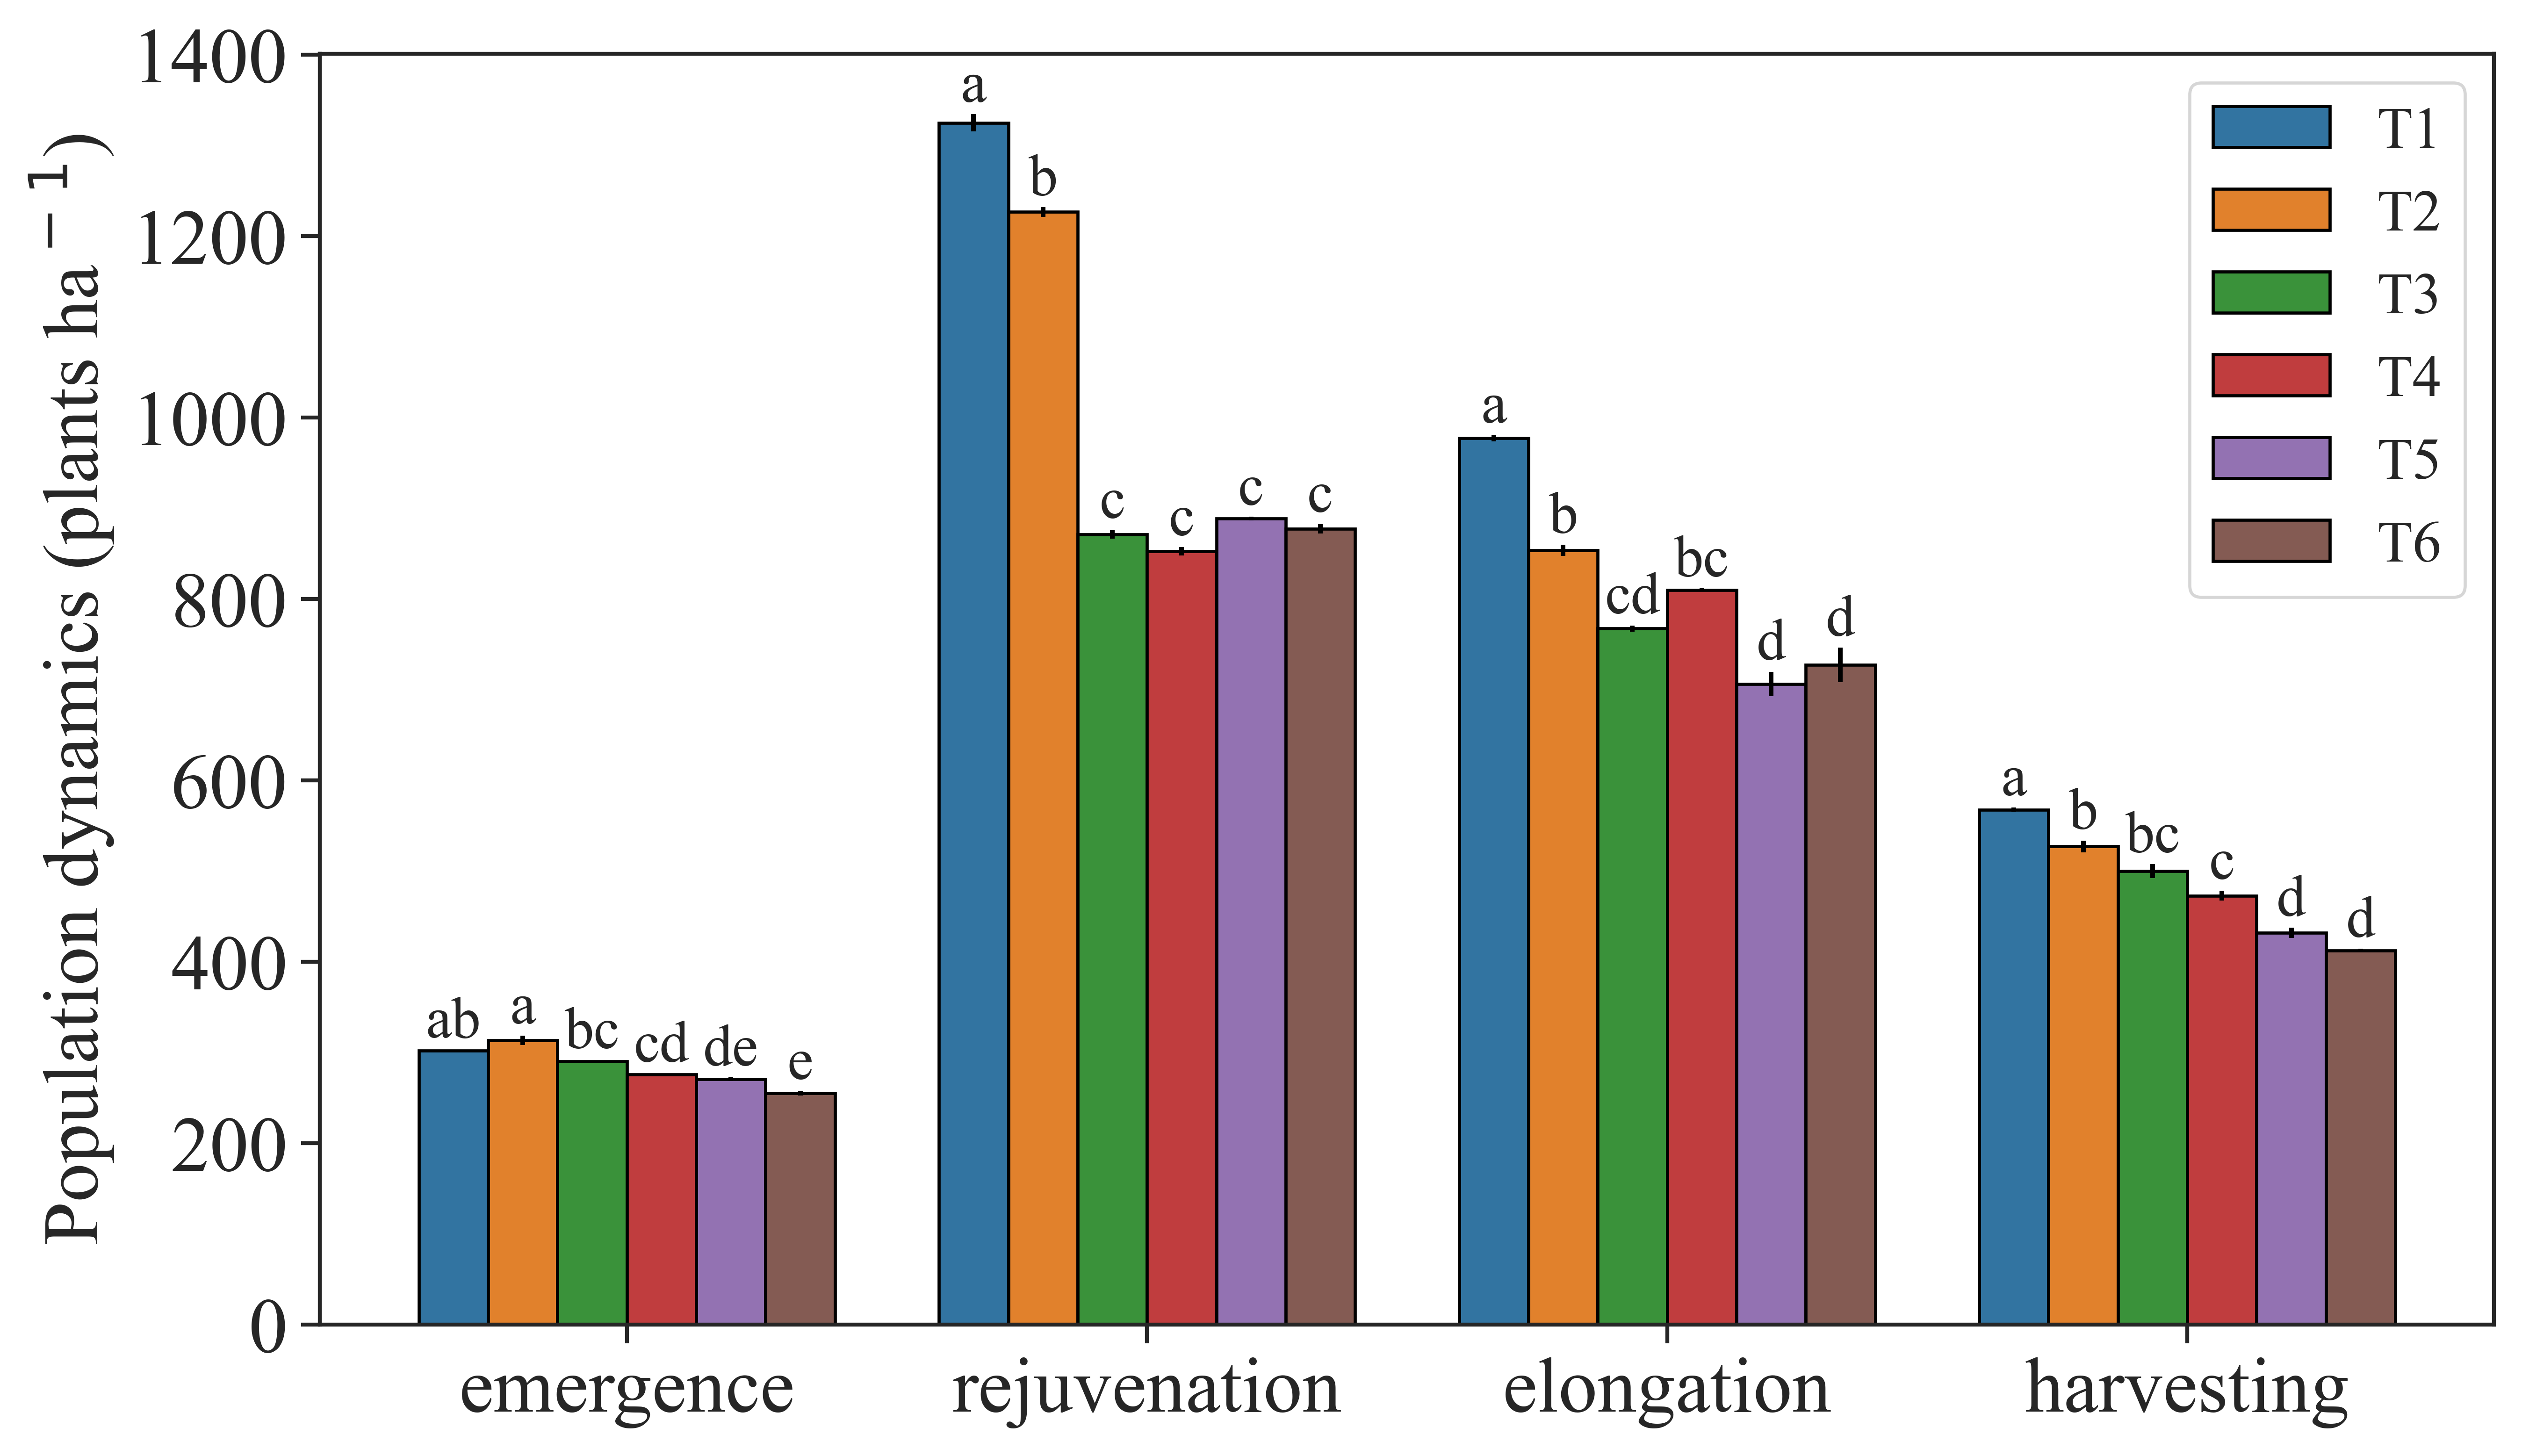

In [5]:
fig=plt.figure(figsize=(10,6),dpi=600)

sns.set_style("ticks",{'font.sans-serif':'Times New Roman'})
sns.set_context("paper",font_scale=1)

ax=fig.add_subplot()
ax = sns.barplot(x="时期", y="群体", hue="处理",ci='群体std',data=df,edgecolor='black')

x_locate = [p.get_x() + 0.5*p.get_width() for p in ax.patches]
y_locate = [p.get_height() for p in ax.patches]
sum_lst = [x + y for x, y in zip(list(df["群体std"]),y_locate)]
ax.errorbar(x=x_locate, y=y_locate, yerr=df["群体std"], fmt="none", c= "k")
for a,b,c in zip(x_locate,sum_lst,df["群体5%"].tolist()):
    ax.text(a,b,c, ha='center',va='bottom',fontsize=15)
    
ax.set_ylabel('Population dynamics (plants ha${^-}$${^1}$)',fontsize=20)
ax.set_xlabel(None)
ax.legend(loc=0,fontsize=15)
plt.tick_params(labelsize=20)

plt.savefig("D:/博士/20年小麦/图/群体.jpg")

In [17]:
df = pd.read_excel("D:/博士/20年小麦/试验结果-整理/共同体.xlsx",sheet_name="灌浆-整理")

df.head()

,时期,处理,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,百粒重,百粒重5%,百粒重std
0,5,T1,0.779412,0.628235,0.566239,0.530864,0.626188,a,0.023770
1,10,T1,1.434579,1.002237,1.259336,1.139810,1.208991,b,0.039717
2,15,T1,2.313084,2.033816,2.143158,2.292011,2.195517,b,0.028510
3,20,T1,3.534335,3.164589,3.259424,2.965909,3.231064,c,0.051159
4,25,T1,4.897872,4.815846,4.757794,4.727273,4.799696,c,0.016250


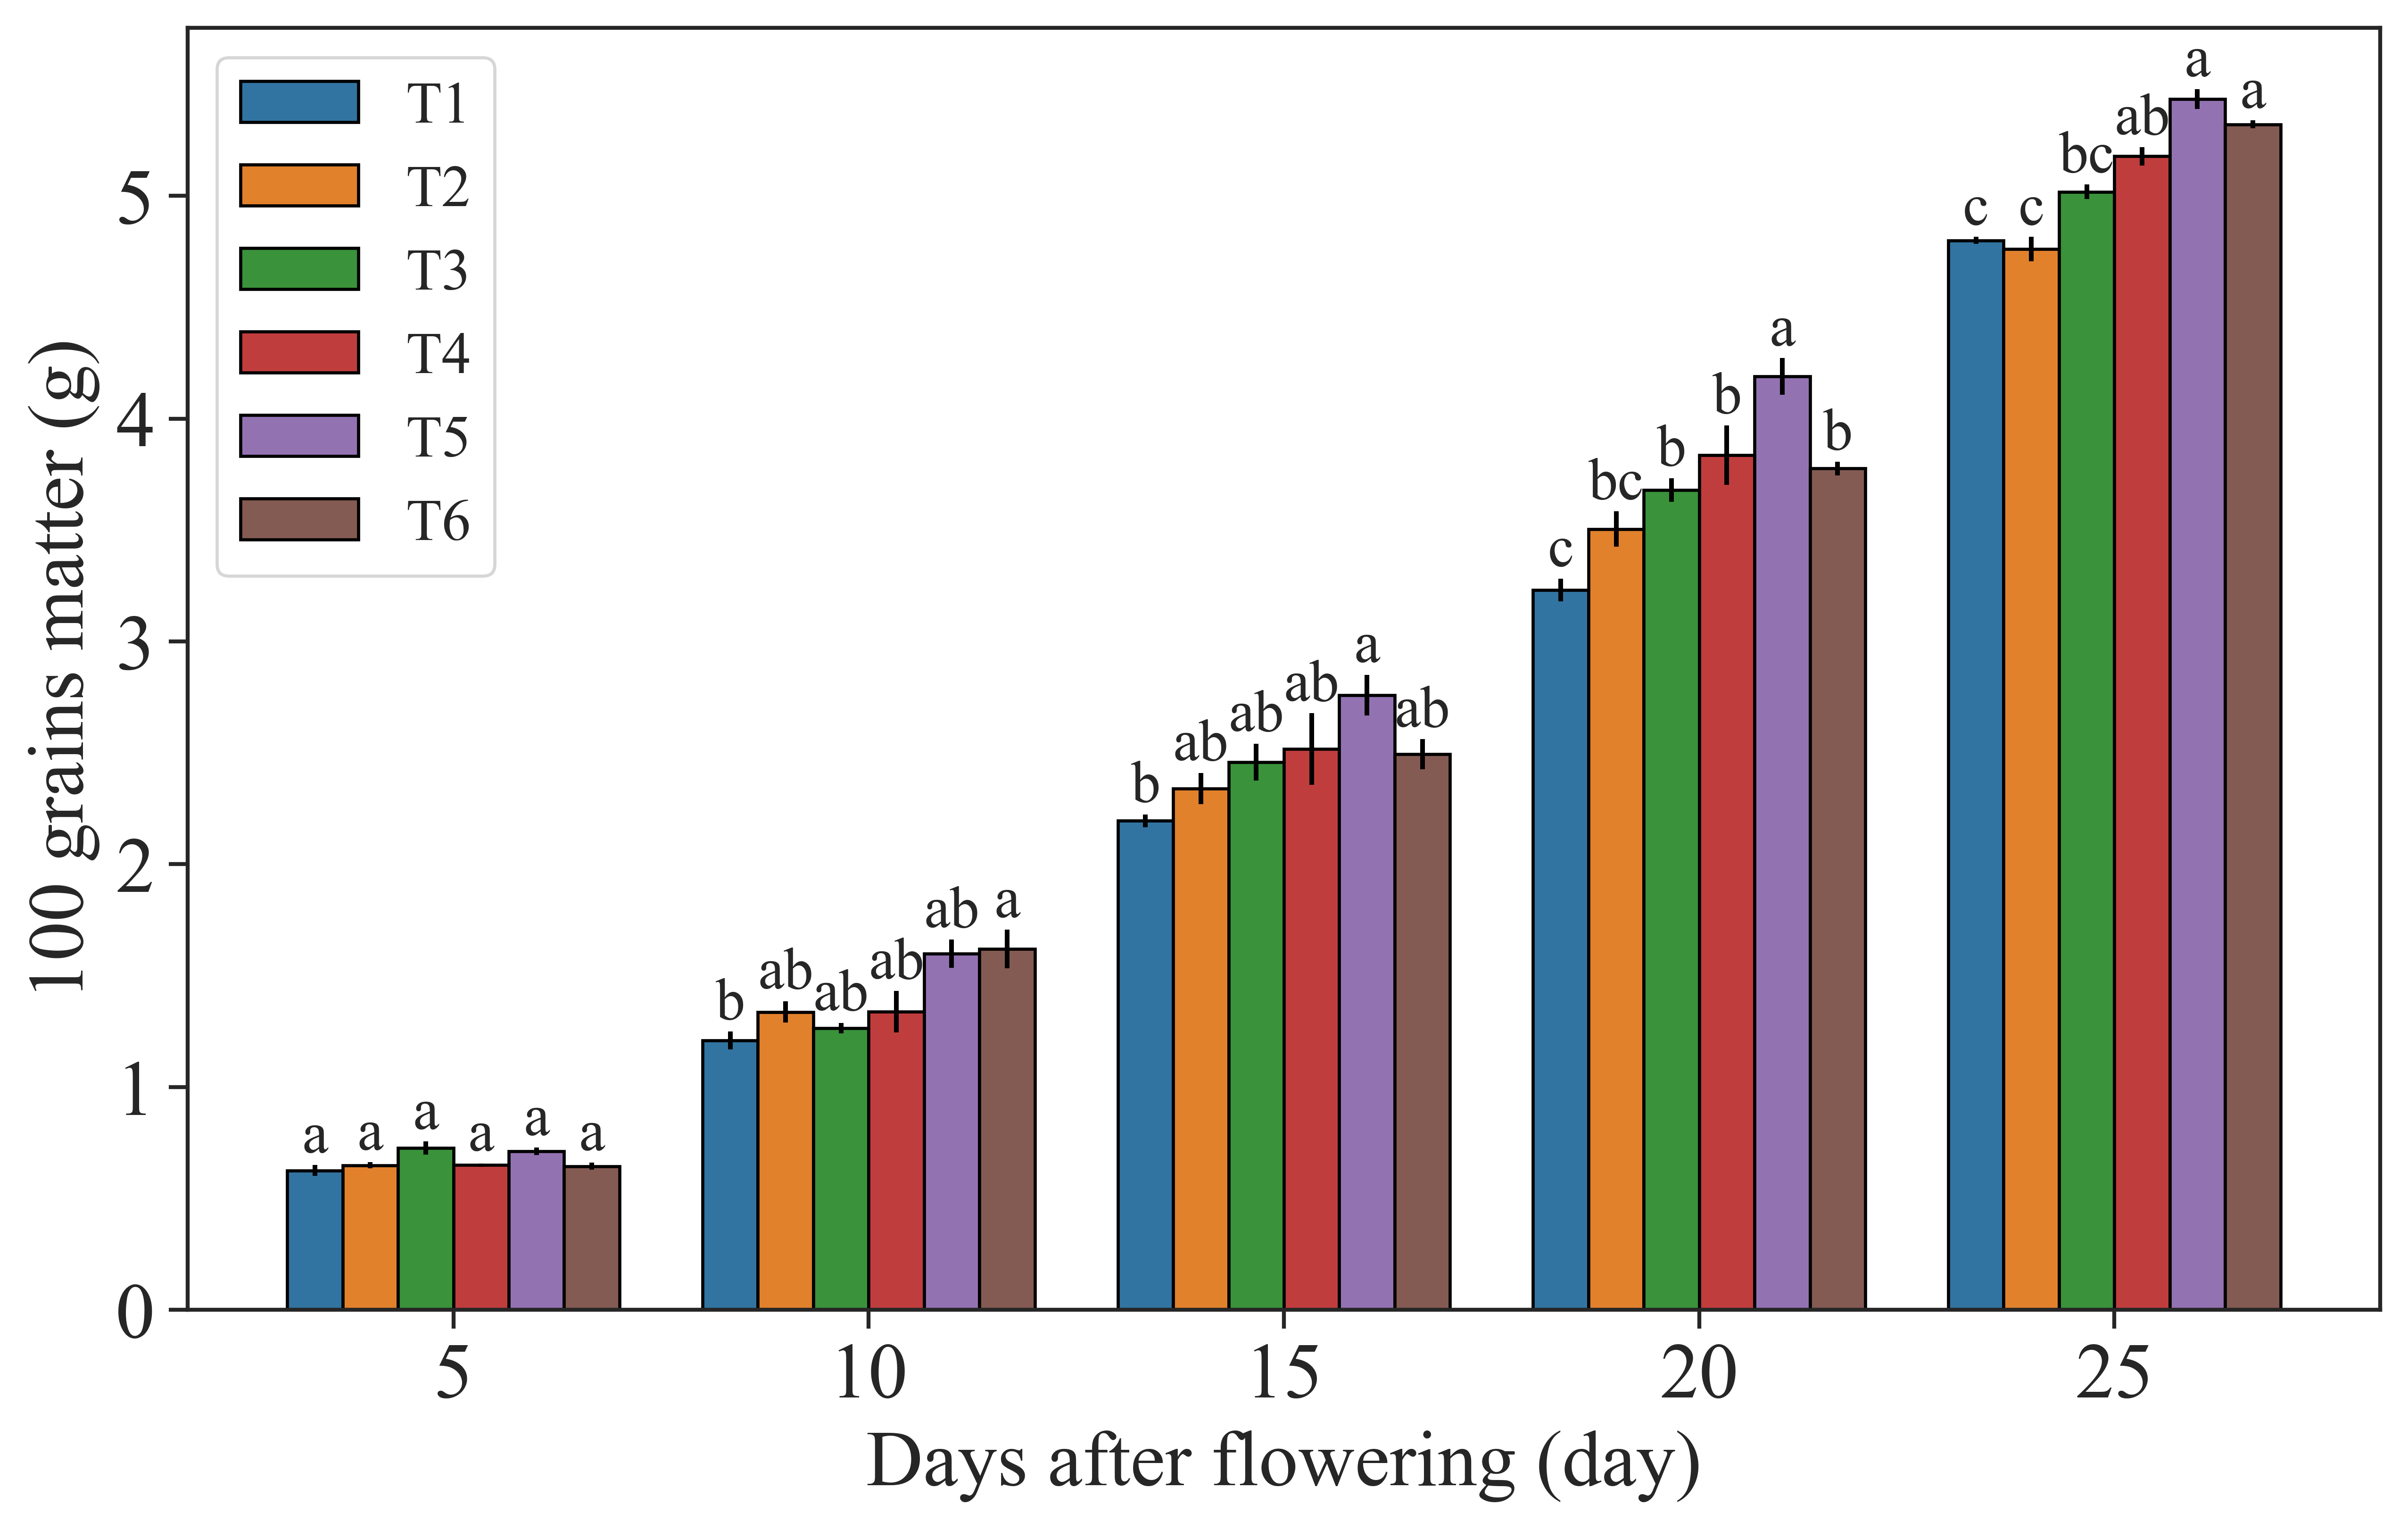

In [19]:
fig=plt.figure(figsize=(10,6),dpi=600)

sns.set_style("ticks",{'font.sans-serif':'Times New Roman'})
sns.set_context("paper",font_scale=1)

ax=fig.add_subplot()
ax = sns.barplot(x="时期", y="百粒重", hue="处理",ci='百粒重std',data=df,edgecolor='black')

x_locate = [p.get_x() + 0.5*p.get_width() for p in ax.patches]
y_locate = [p.get_height() for p in ax.patches]
sum_lst = [x + y for x, y in zip(list(df["百粒重std"]),y_locate)]
ax.errorbar(x=x_locate, y=y_locate, yerr=df["百粒重std"], fmt="none", c= "k")
for a,b,c in zip(x_locate,sum_lst,df["百粒重5%"].tolist()):
    ax.text(a,b,c, ha='center',va='bottom',fontsize=15)
    
ax.set_ylabel('100 grains matter (g)',fontsize=20)
ax.set_xlabel("Days after flowering (day)",fontsize=20)
ax.legend(loc=0,fontsize=15)
plt.tick_params(labelsize=20)

plt.savefig("D:/博士/20年小麦/图/百粒重.jpg")

In [20]:
df = pd.read_excel("D:/博士/20年小麦/试验结果-整理/共同体.xlsx",sheet_name="干物质-整理")

df.head()

,时期,处理,茎1,Unnamed: 3,Unnamed: 4,Unnamed: 5,茎,茎5%,茎std,叶1,...,干重,干重5%,干重std,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,elongation,T1,20.950,19.065,17.690,16.850,18.63875,b,0.387768,9.55,...,27.52375,b,0.485064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,flowering,T1,48.810,55.890,47.780,52.330,51.20250,a,0.797275,10.28,...,77.87250,ab,0.375430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,grain filling,T1,54.190,56.370,53.120,52.370,54.01250,ab,0.376739,8.85,...,107.68500,bc,0.745781,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,harvesting,T1,34.715,35.655,34.405,37.910,35.67125,ab,0.343012,5.94,...,111.33250,b,1.215475,0.509753,0.498496,0.504972,0.525422,0.509661,b,0.002485
4,elongation,T2,21.685,20.295,16.835,18.985,19.45000,b,0.446579,8.01,...,27.36125,b,0.550083,NaN,NaN,NaN,NaN,NaN,NaN,NaN


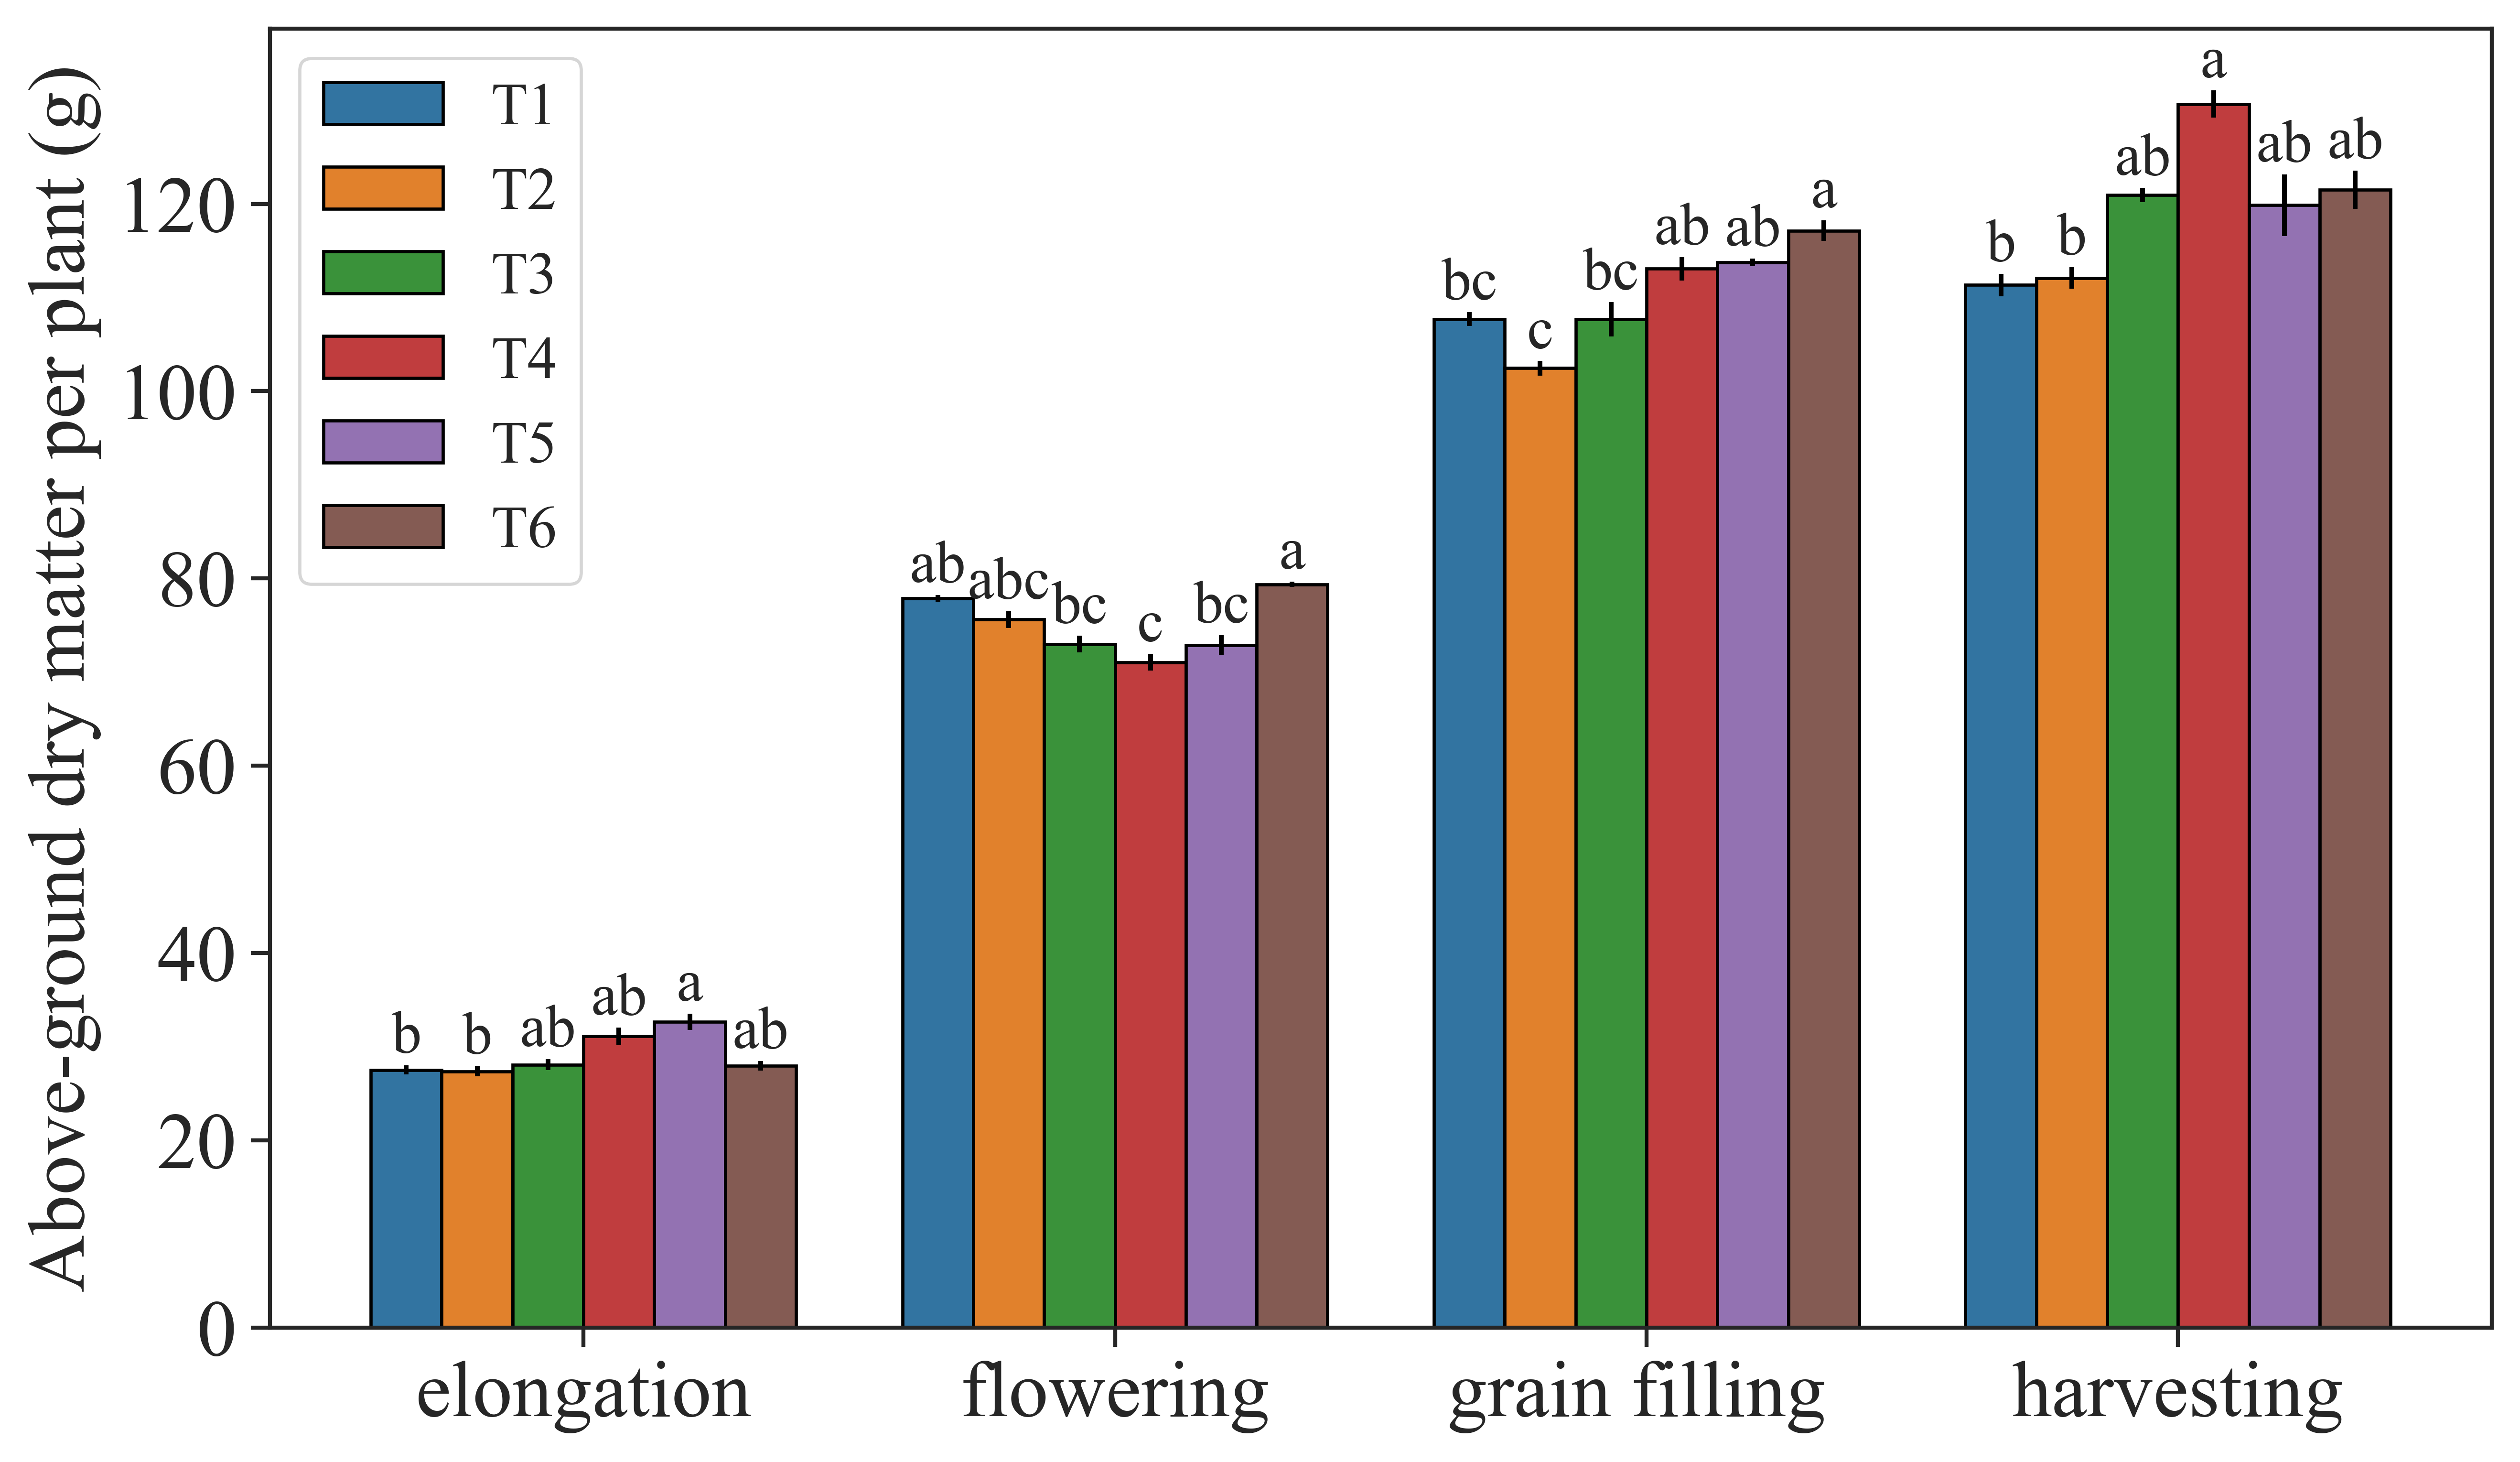

In [22]:
fig=plt.figure(figsize=(10,6),dpi=600)

sns.set_style("ticks",{'font.sans-serif':'Times New Roman'})
sns.set_context("paper",font_scale=1)

ax=fig.add_subplot()
ax = sns.barplot(x="时期", y="干重", hue="处理",ci='干重std',data=df,edgecolor='black')

x_locate = [p.get_x() + 0.5*p.get_width() for p in ax.patches]
y_locate = [p.get_height() for p in ax.patches]
sum_lst = [x + y for x, y in zip(list(df["干重std"]),y_locate)]
ax.errorbar(x=x_locate, y=y_locate, yerr=df["干重std"], fmt="none", c= "k")
for a,b,c in zip(x_locate,sum_lst,df["干重5%"].tolist()):
    ax.text(a,b,c, ha='center',va='bottom',fontsize=15)
    
ax.set_ylabel('Above-ground dry matter per plant (g)',fontsize=20)
ax.set_xlabel(None)
ax.legend(loc=0,fontsize=15)
plt.tick_params(labelsize=20)

plt.savefig("D:/博士/20年小麦/图/单株干重.jpg")